In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

#Игнорируем ошибки фильтров
warnings.filterwarnings('ignore')

In [5]:
le = pd.read_csv('data/raw/life_expectancy_data.csv', delimiter=',')
le.dataframeName = 'Life Expectancy Data.csv'
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#Переименовываем столбцы
le.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"}, inplace=True)

In [7]:
le.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2732.000000,2724.000000,2724.000000,2732.000000,2547.000000,2732.000000,2207.000000,2732.000000,2699.000000,2732.000000,2714.000000,2517.000000,2714.000000,2732.000000,2317.000000,2.128000e+03,2699.000000,2699.000000,2577.000000,2581.000000
mean,2007.501098,69.120228,165.923642,30.588946,4.555748,727.049563,80.860897,2430.580527,38.069767,42.385066,82.409359,5.946007,82.273397,1.722328,7316.813082,1.245470e+07,4.903927,4.935495,0.624236,11.951724
std,4.626314,9.511317,123.837567,118.158278,4.034548,1974.303746,25.130776,11240.642911,20.062308,160.480411,23.421806,2.506294,23.628897,4.962085,14020.856082,5.761456e+07,4.448684,4.540056,0.211894,3.376084
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,75.000000,0.000000,0.850000,4.595646,77.000000,0.000000,19.100000,0.000000,77.000000,4.280000,78.000000,0.100000,464.184650,1.917392e+05,1.600000,1.600000,0.489000,10.100000
50%,2007.000000,72.000000,145.000000,3.000000,3.650000,64.395284,92.000000,17.000000,42.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.383743e+06,3.400000,3.400000,0.675000,12.300000
75%,2012.000000,75.600000,228.250000,23.000000,7.600000,437.086674,97.000000,370.500000,56.100000,30.000000,97.000000,7.500000,97.000000,0.800000,5828.745662,7.475598e+06,7.200000,7.300000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
#Смотрим тип данных и количество ненулевых значений
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2732 non-null   object 
 1   Year                      2732 non-null   int64  
 2   Status                    2732 non-null   object 
 3   Life_Expectancy           2724 non-null   float64
 4   Adult_Mortality           2724 non-null   float64
 5   Infant_Deaths             2732 non-null   int64  
 6   Alcohol                   2547 non-null   float64
 7   Percentage_Exp            2732 non-null   float64
 8   HepatitisB                2207 non-null   float64
 9   Measles                   2732 non-null   int64  
 10  BMI                       2699 non-null   float64
 11  Under_Five_Deaths         2732 non-null   int64  
 12  Polio                     2714 non-null   float64
 13  Tot_Exp                   2517 non-null   float64
 14  Diphther

In [9]:
#Смотрим количество нулевых значений в процентном соотношении
le.isnull().sum()*100/le.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.292826
Adult_Mortality              0.292826
Infant_Deaths                0.000000
Alcohol                      6.771596
Percentage_Exp               0.000000
HepatitisB                  19.216691
Measles                      0.000000
BMI                          1.207906
Under_Five_Deaths            0.000000
Polio                        0.658858
Tot_Exp                      7.869693
Diphtheria                   0.658858
HIV/AIDS                     0.000000
GDP                         15.190337
Population                  22.108346
thinness_1to19_years         1.207906
thinness_5to9_years          1.207906
Income_Comp_Of_Resources     5.673499
Schooling                    5.527086
dtype: float64

In [10]:
#Выписываем уникальные страны (то есть убирает повторения)
country_list = le.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol',
             'HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP',
             'Population','thinness_1to19_years','thinness_5to9_years',
             'Income_Comp_Of_Resources','Schooling']

In [11]:
#Интерполируем все NULL значения
for country in country_list:
    le.loc[le['Country'] == country,fill_list] = le.loc[le['Country'] == country,fill_list].interpolate()

#Выкидываем оставшиеся нулевые значения
le.dropna(inplace=True)

In [12]:
#Проверяем, что все выполнилось правильно
le.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

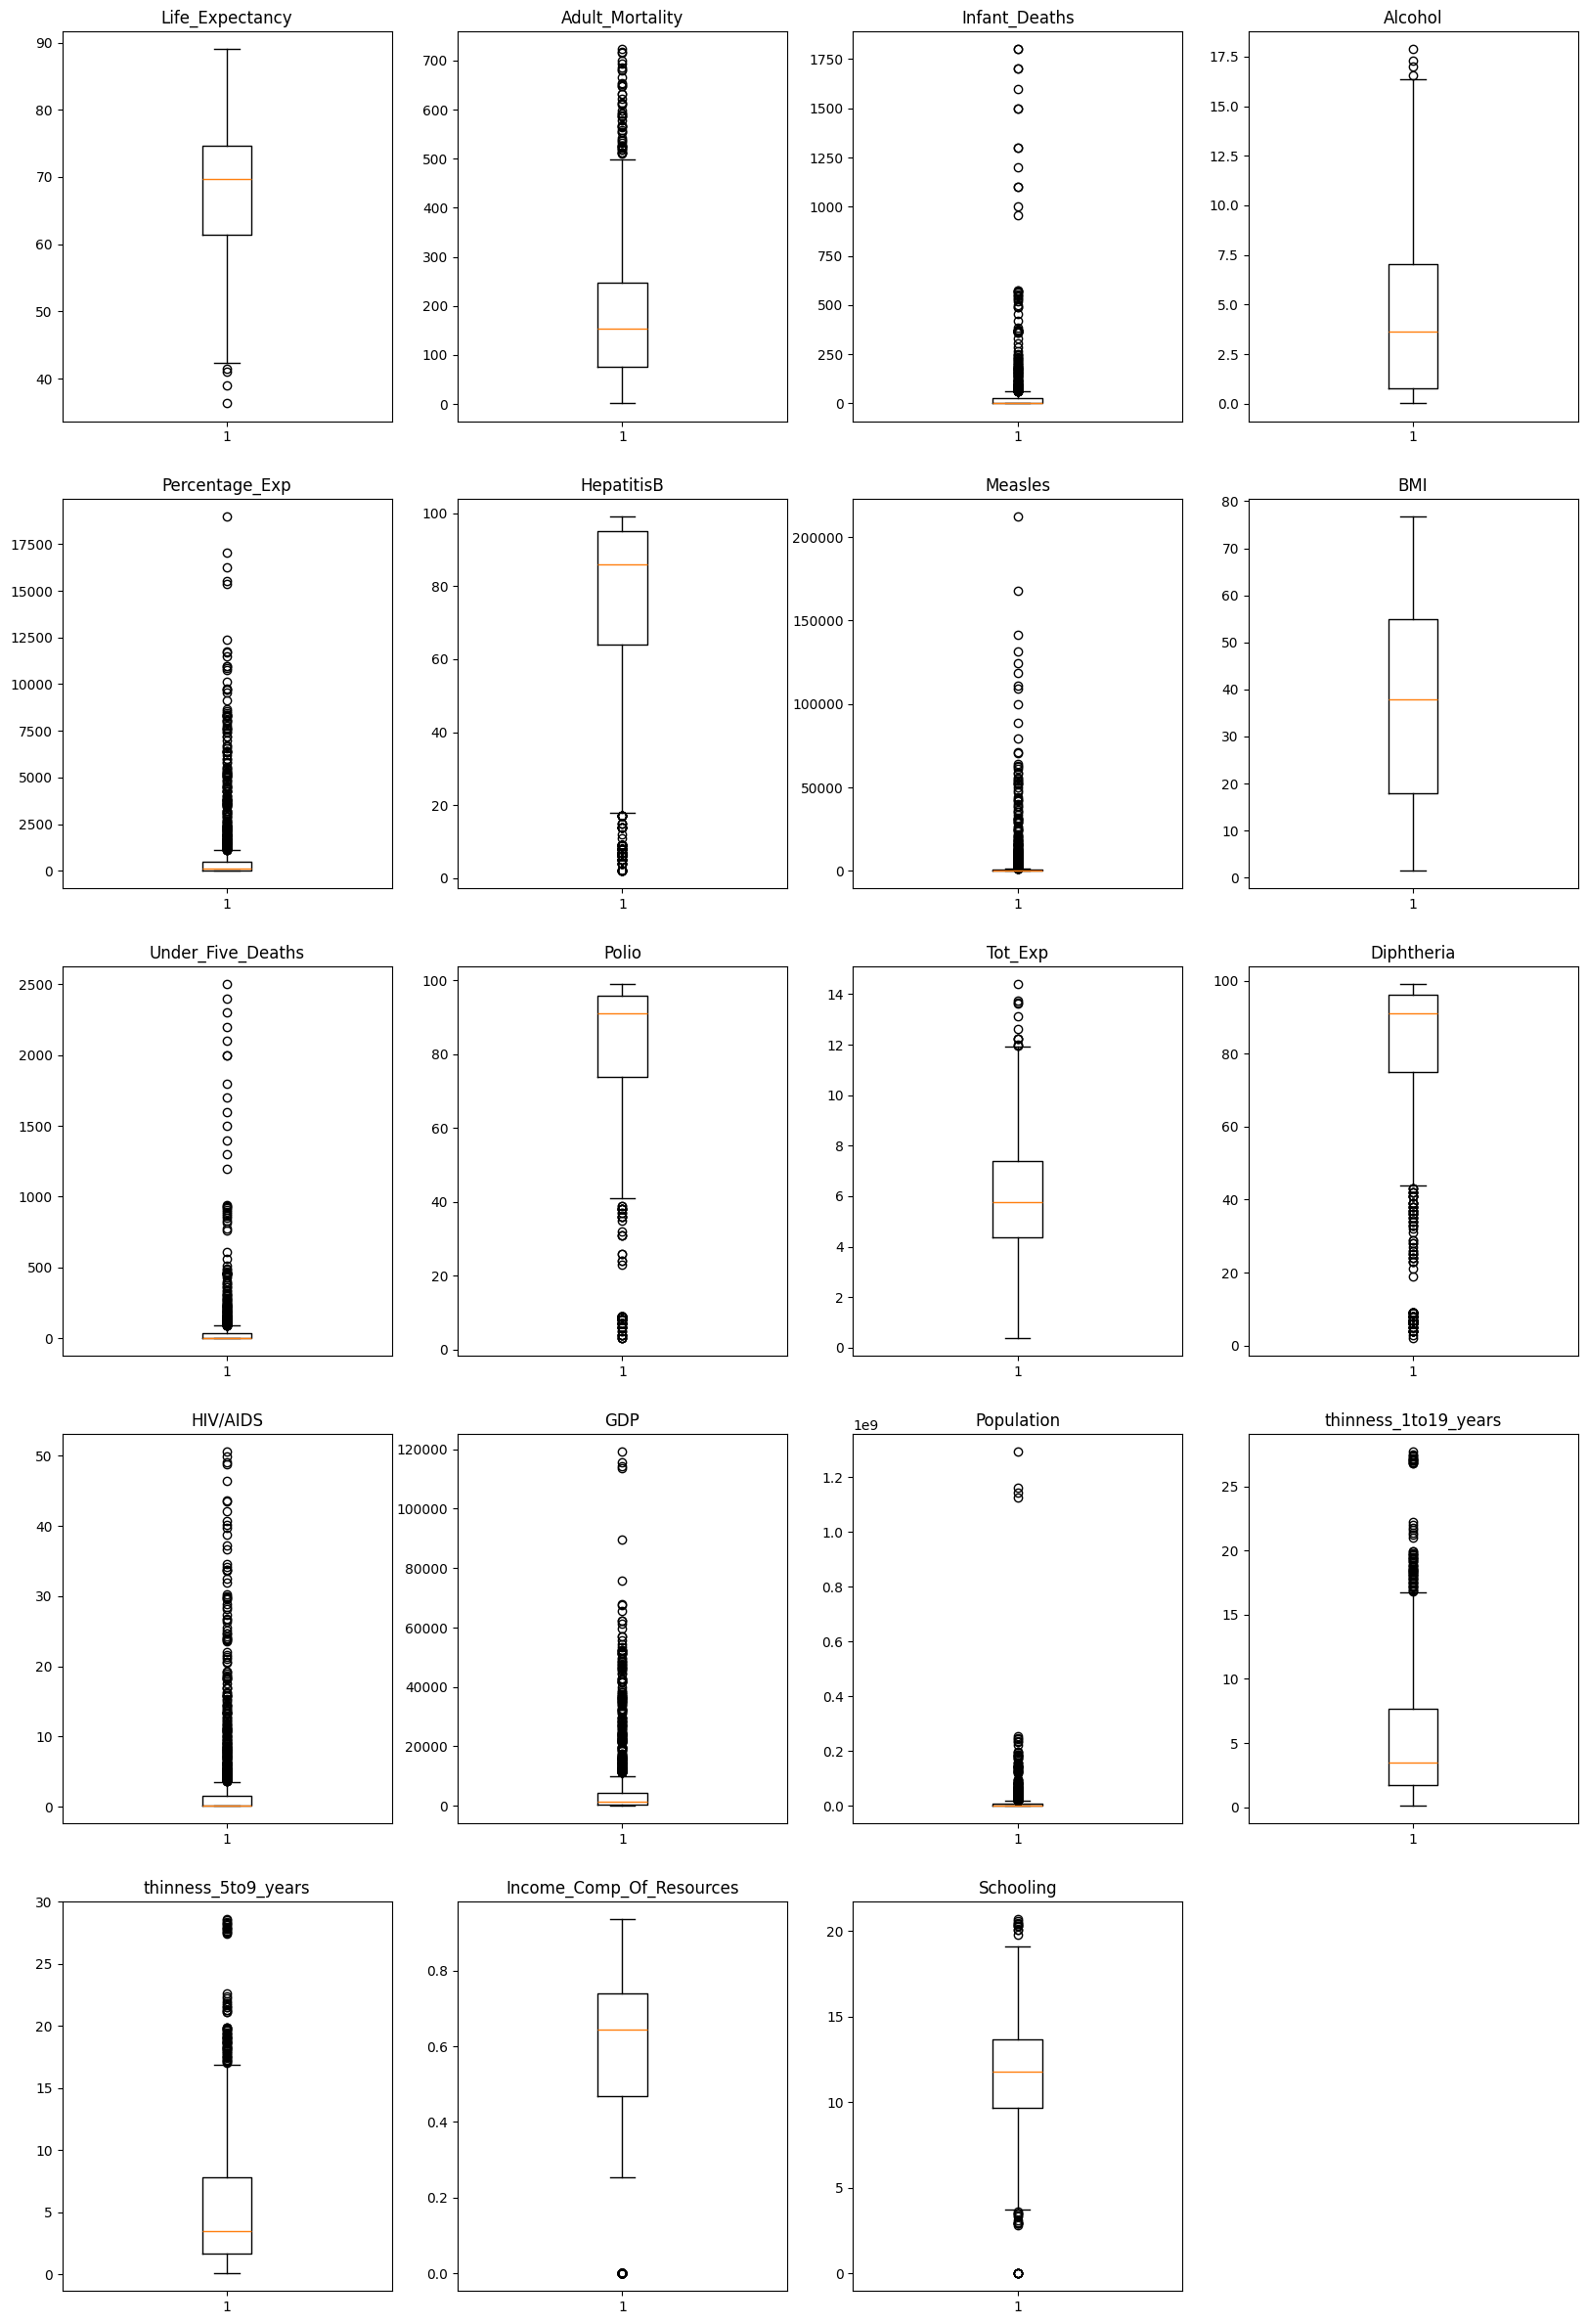

In [13]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,
            'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,
            'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,
            'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

#Ищем "выбросные" значения в каждой категории
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [14]:
#Подсчитываем количество таких значений и их процентное содержание
for variable in col_dict.keys():
    q75, q25 = np.percentile(le[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((le[variable] > max_val) |
                                                                                           (le[variable] < min_val))[0])),len((np.where((le[variable] > max_val) |
                                                                                           (le[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 49 and 2.4660291897332662
Number of outliers and percentage of it in Infant_Deaths : 192 and 9.662808253648716
Number of outliers and percentage of it in Alcohol : 4 and 0.20130850528434827
Number of outliers and percentage of it in Percentage_Exp : 214 and 10.770005032712632
Number of outliers and percentage of it in HepatitisB : 199 and 10.015098137896326
Number of outliers and percentage of it in Measles : 333 and 16.758933064921994
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 201 and 10.1157523905385
Number of outliers and percentage of it in Polio : 142 and 7.146451937594363
Number of outliers and percentage of it in Tot_Exp : 12 and 0.6039255158530448
Number of outliers and percentage of it in Diphtheria : 171 and 8.605938600905889
Number of outliers and perc

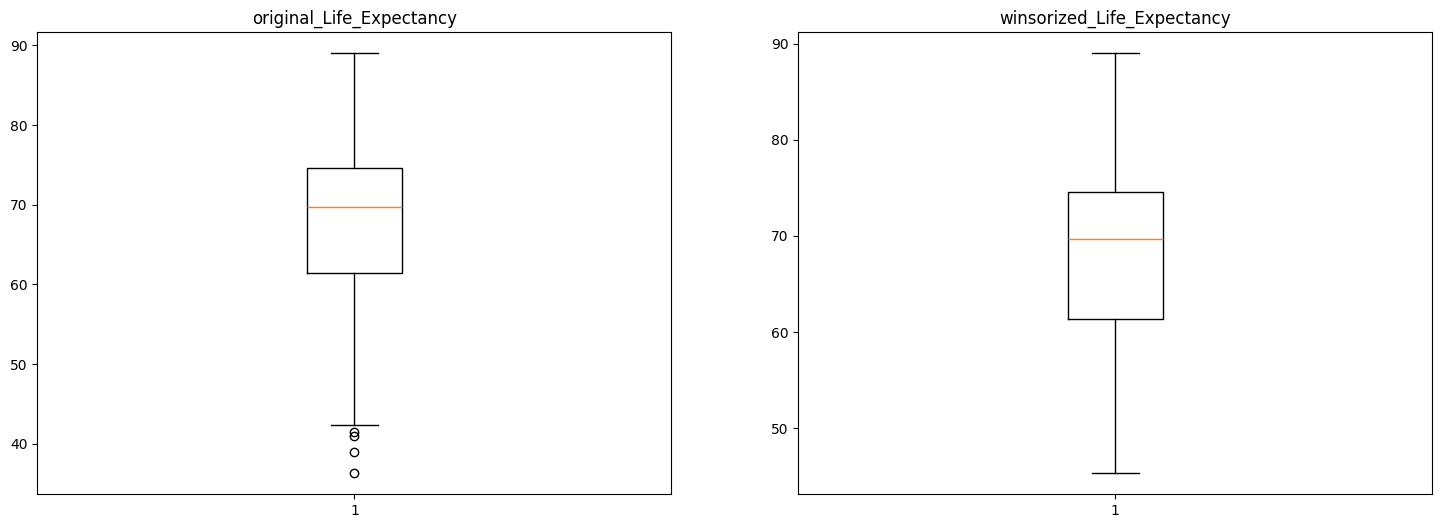

In [15]:
#Подчищаем такие значения, используя технику систематизации
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = le['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(le['Life_Expectancy'], (0.01, 0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

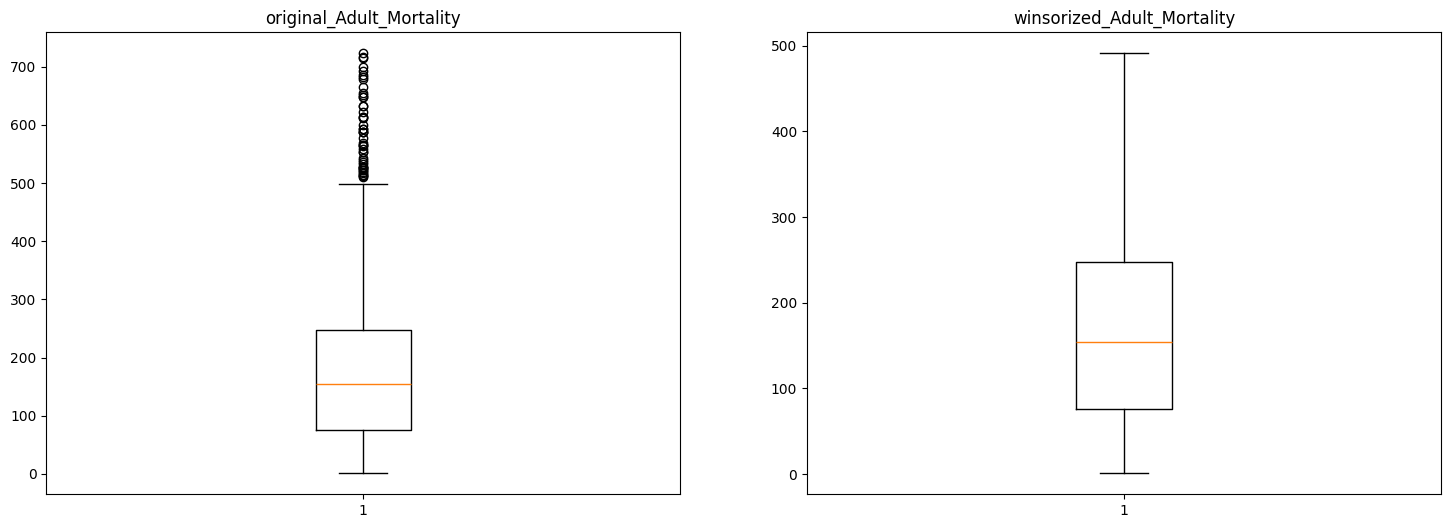

In [16]:
#Проделываем эту операцию для всех остальных свойств
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = le['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(le['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

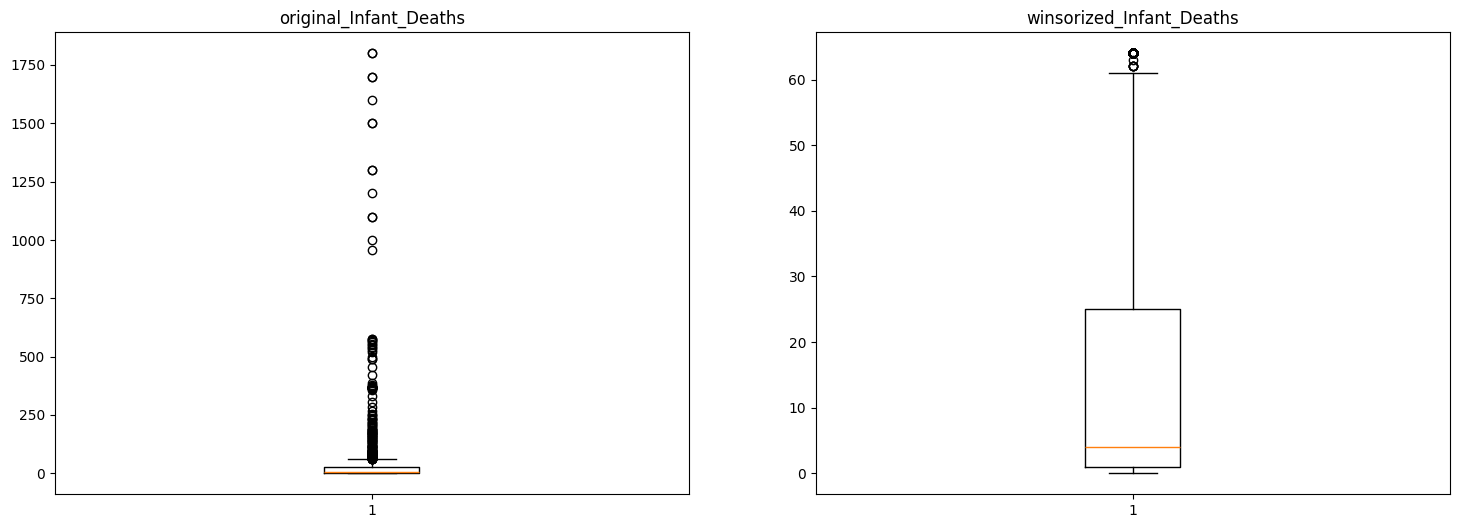

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = le['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(le['Infant_Deaths'], limits=[0.0, 0.1])
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

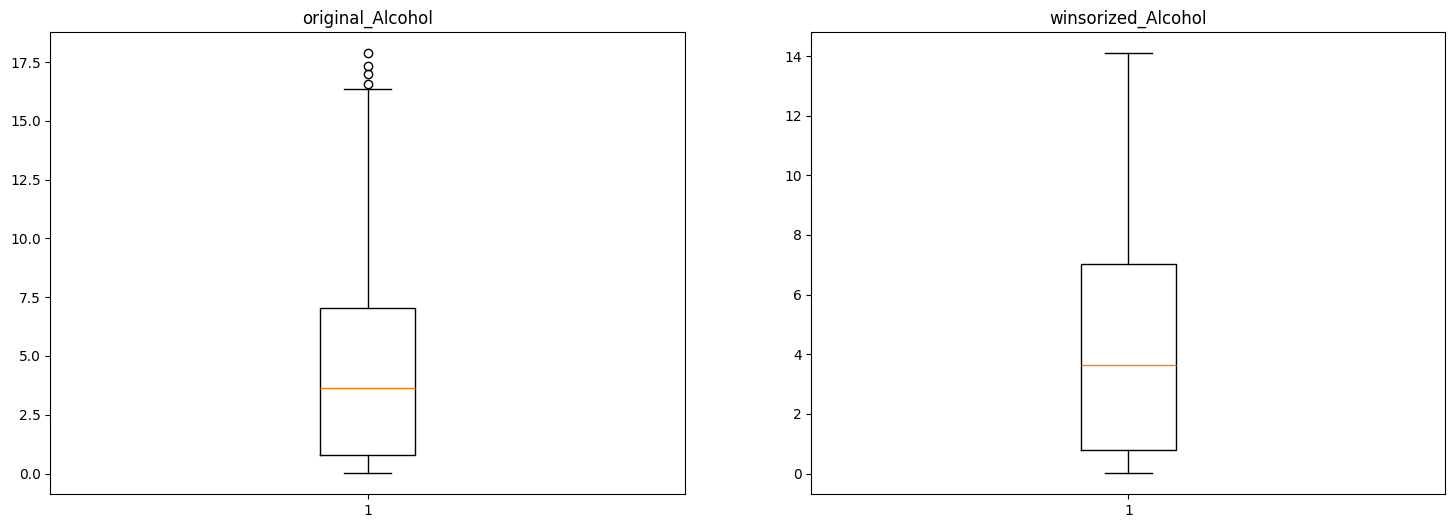

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = le['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(le['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

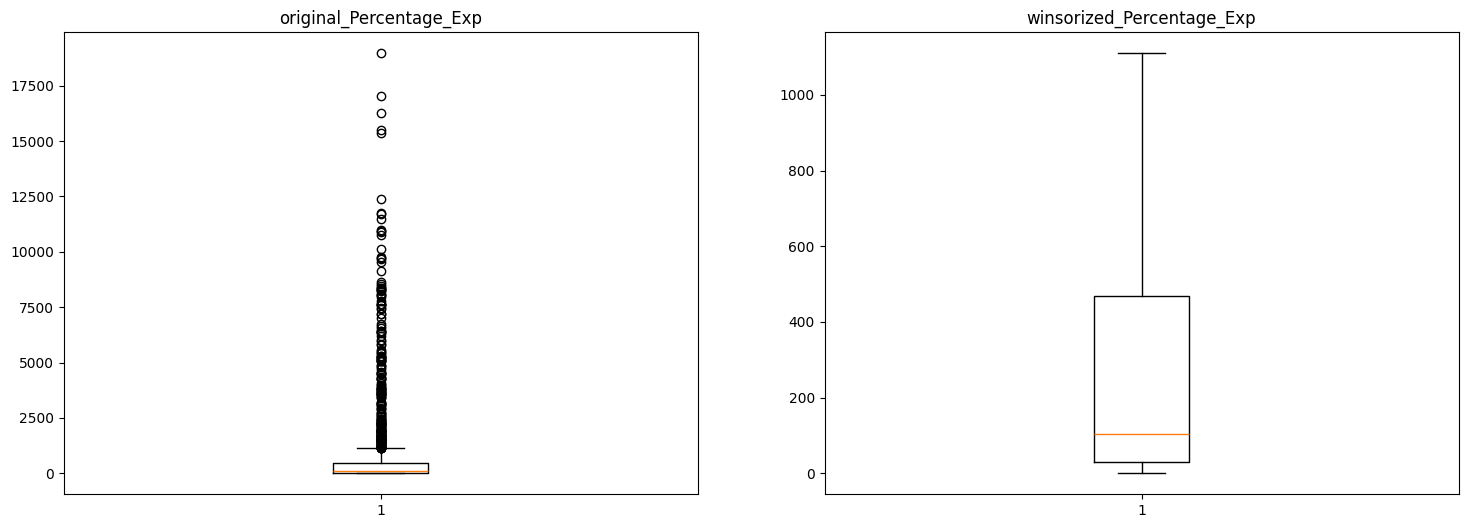

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = le['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(le['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

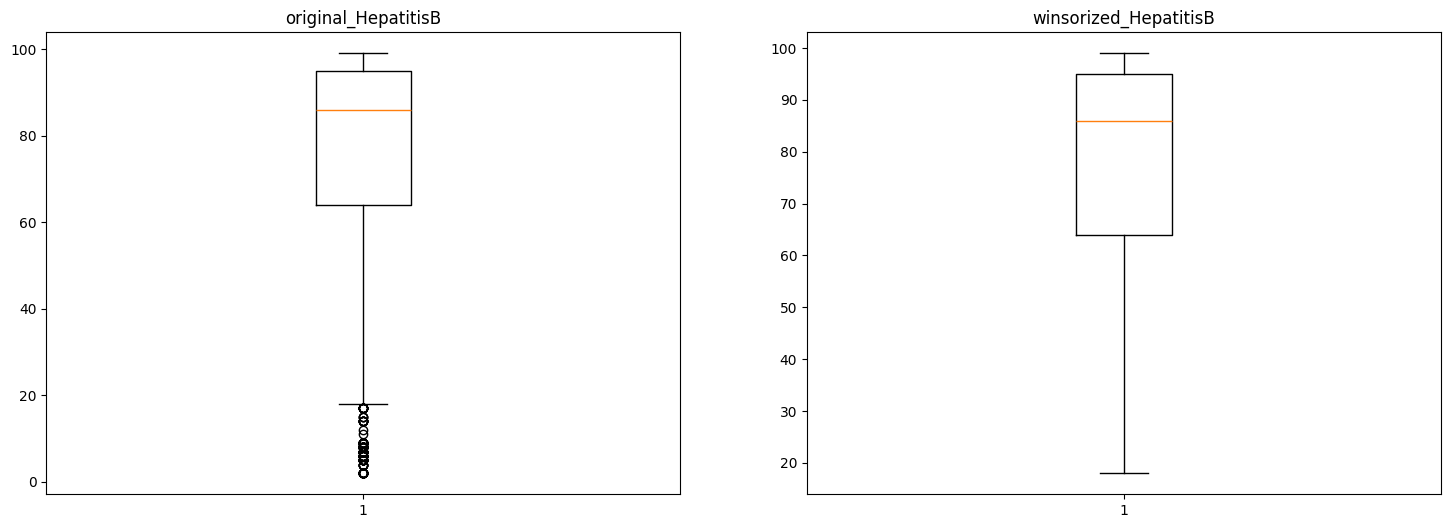

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = le['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(le['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

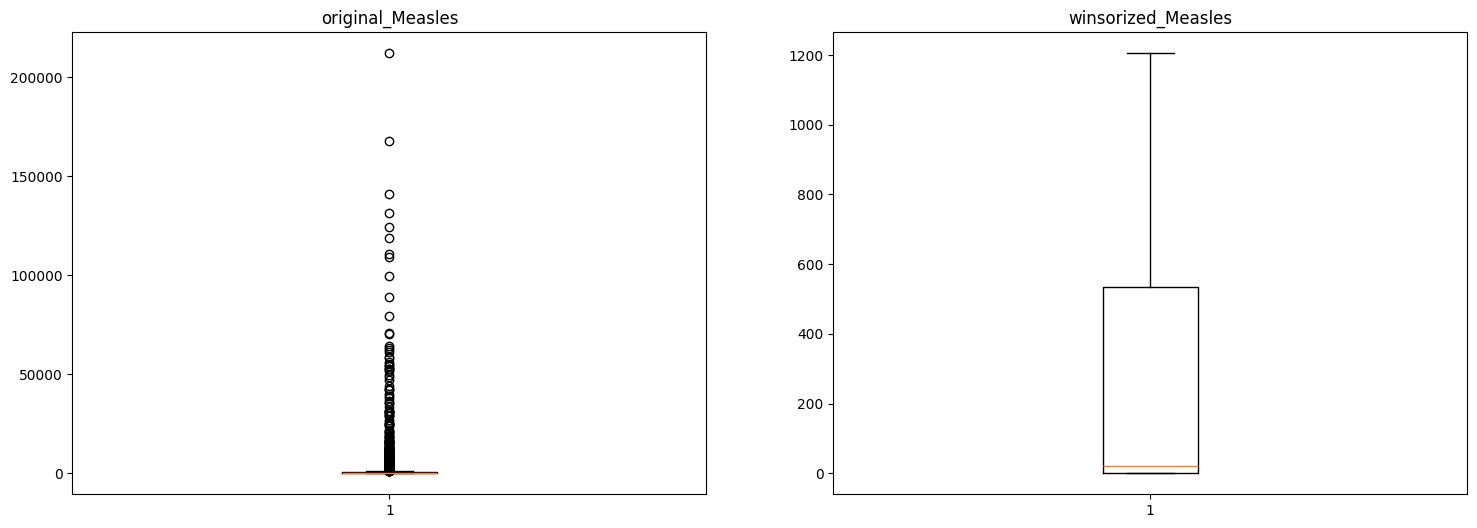

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = le['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(le['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

In [22]:
#Дропаем этот столбик, так как слишком большое процентное содержание выбросных значений
le = le.drop('Measles',axis=1)

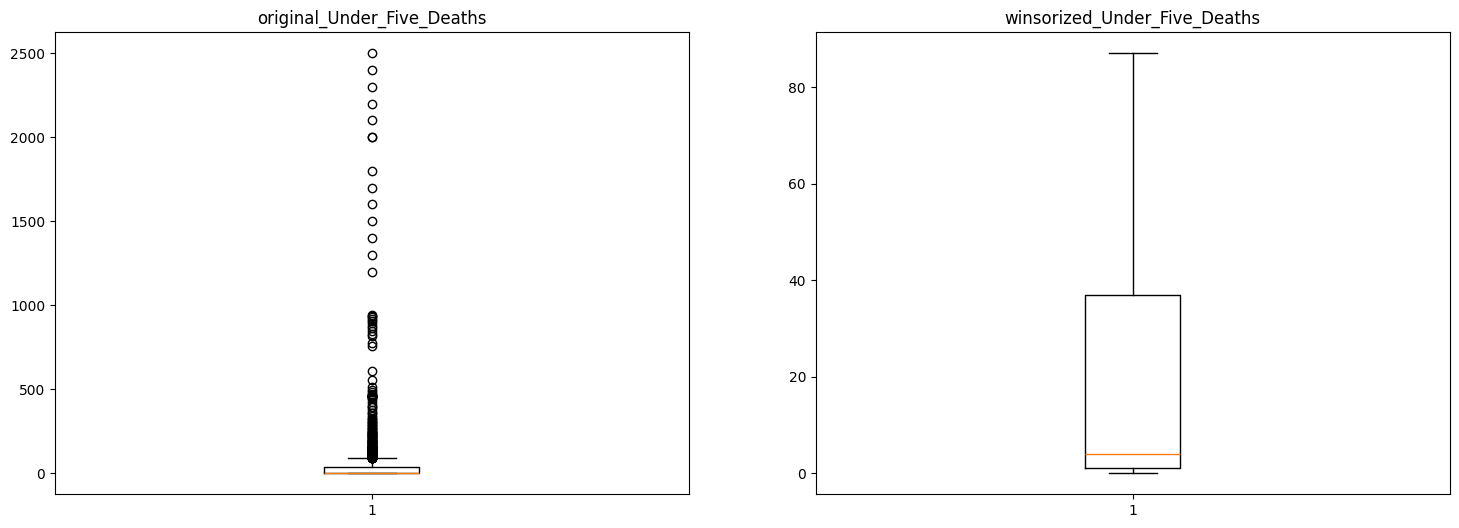

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = le['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(le['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

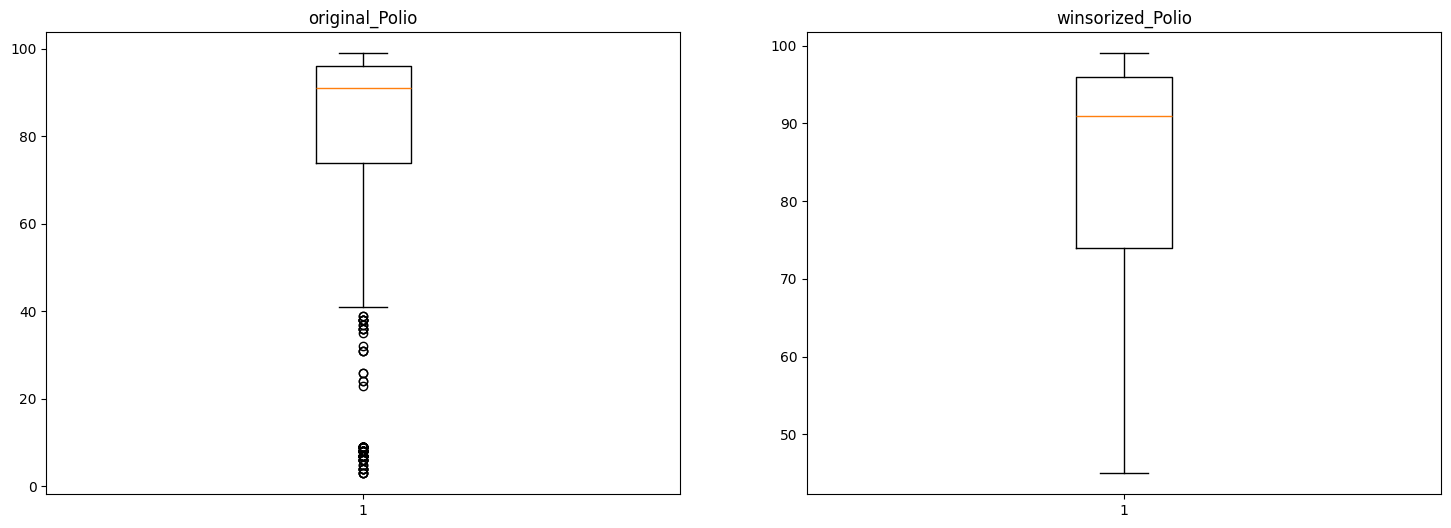

In [24]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = le['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(le['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

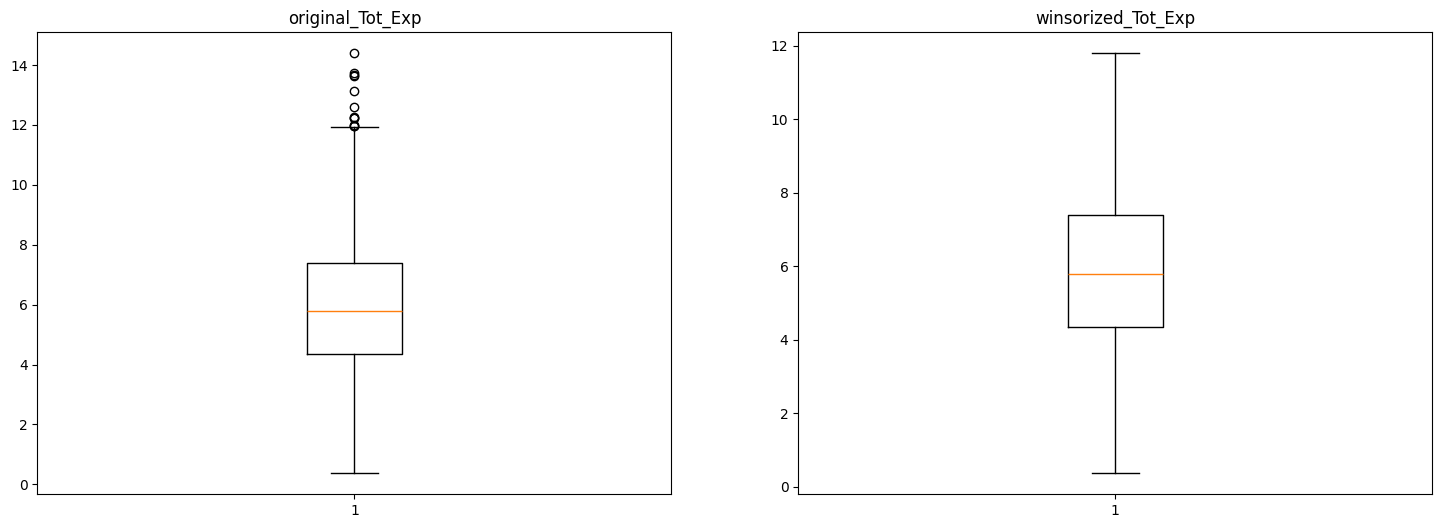

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = le['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(le['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

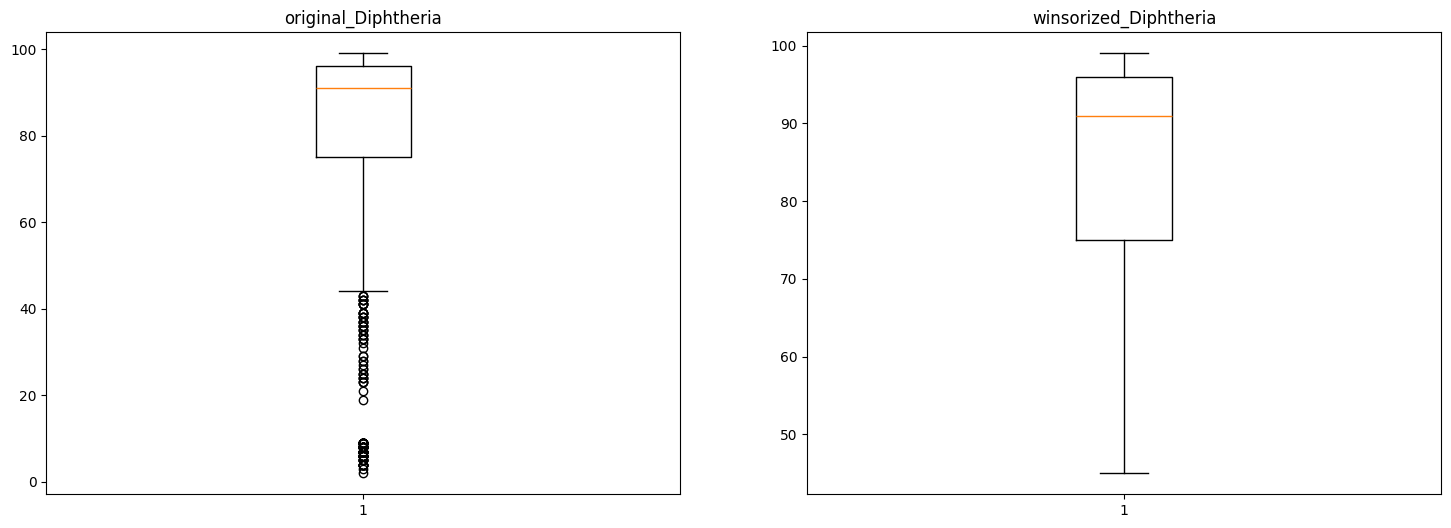

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = le['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(le['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

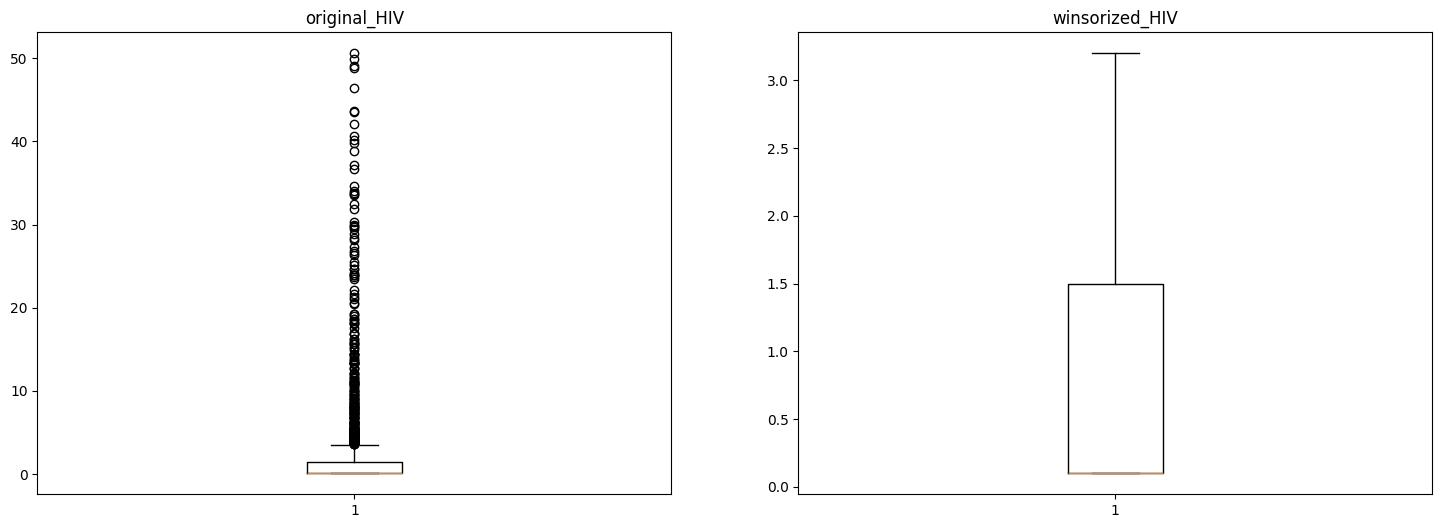

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = le['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(le['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

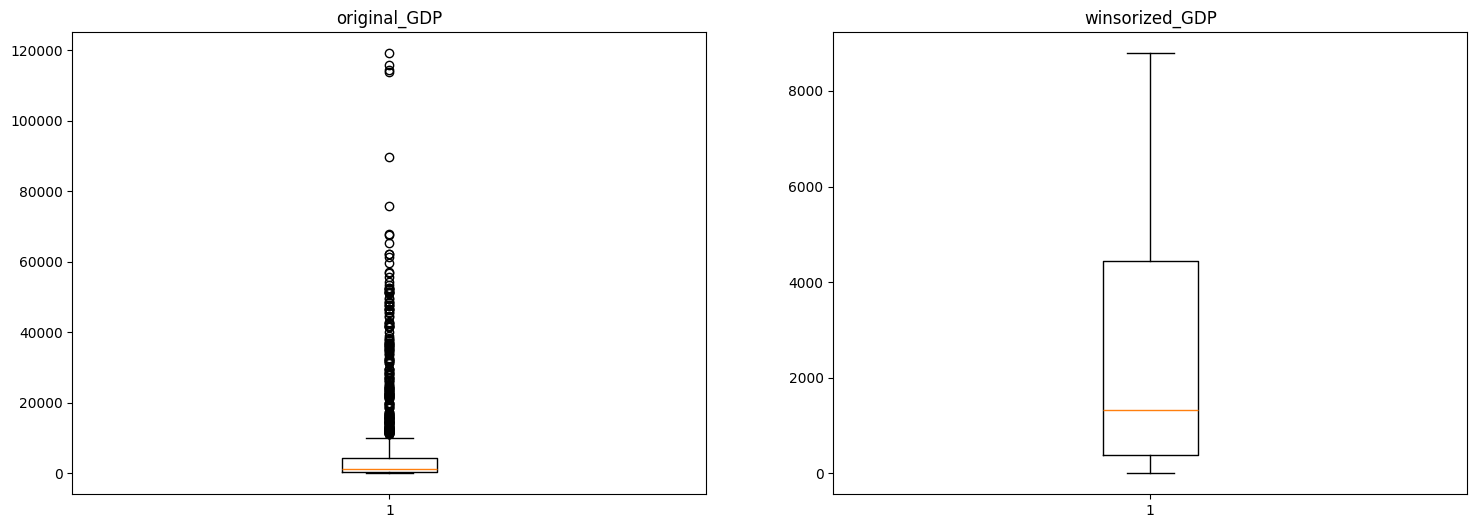

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = le['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(le['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

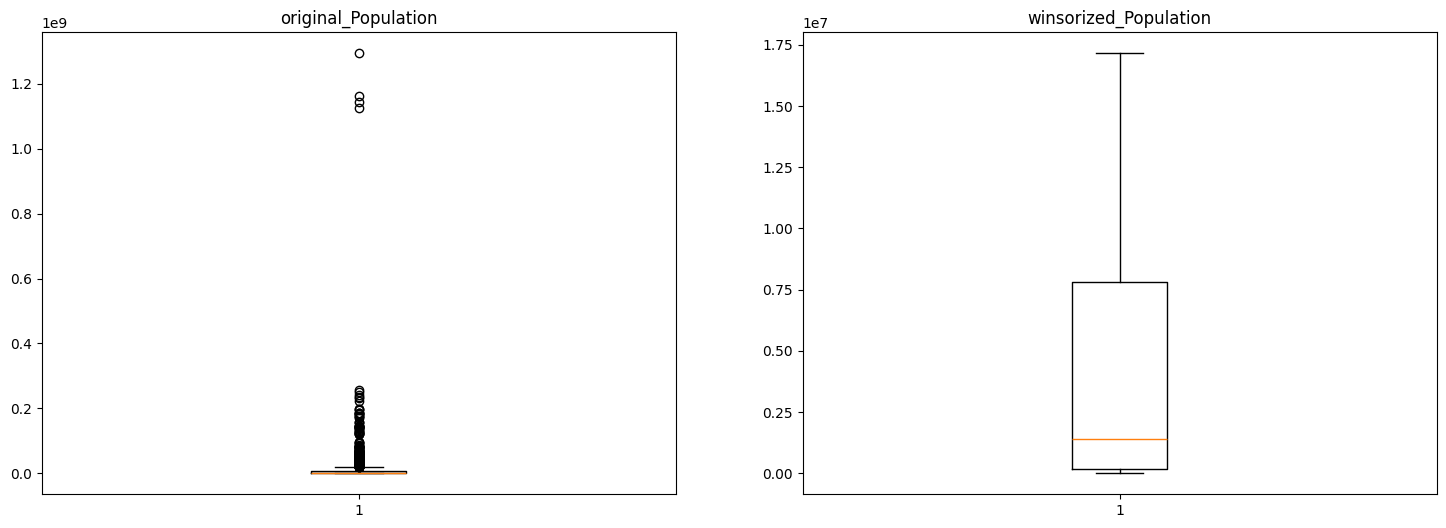

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = le['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(le['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

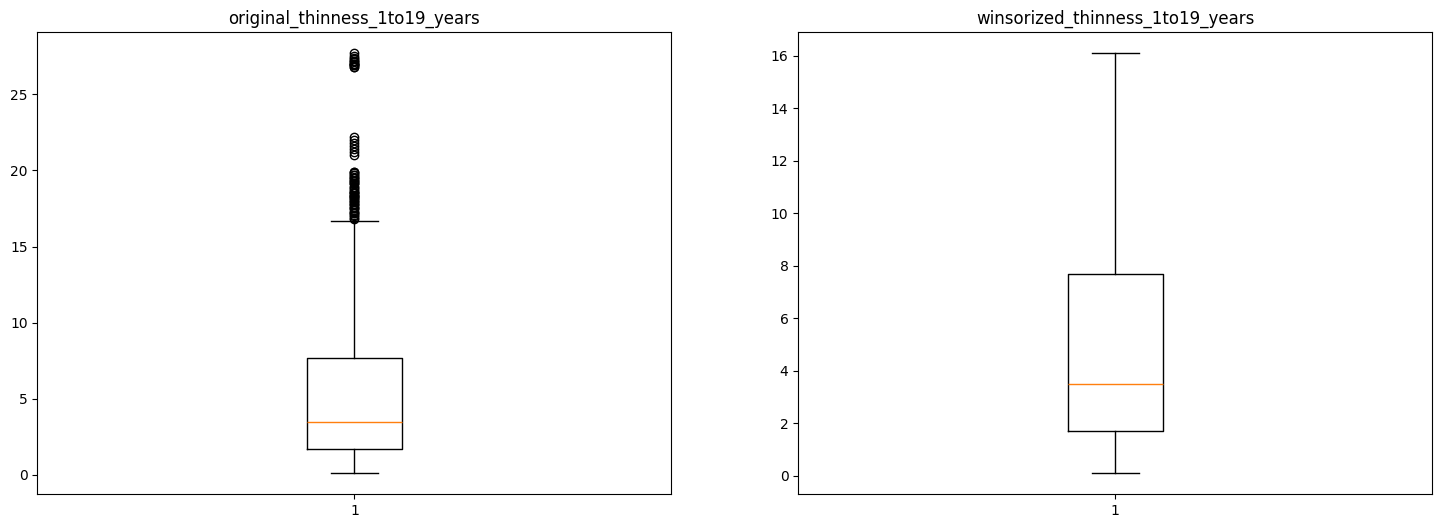

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = le['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(le['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

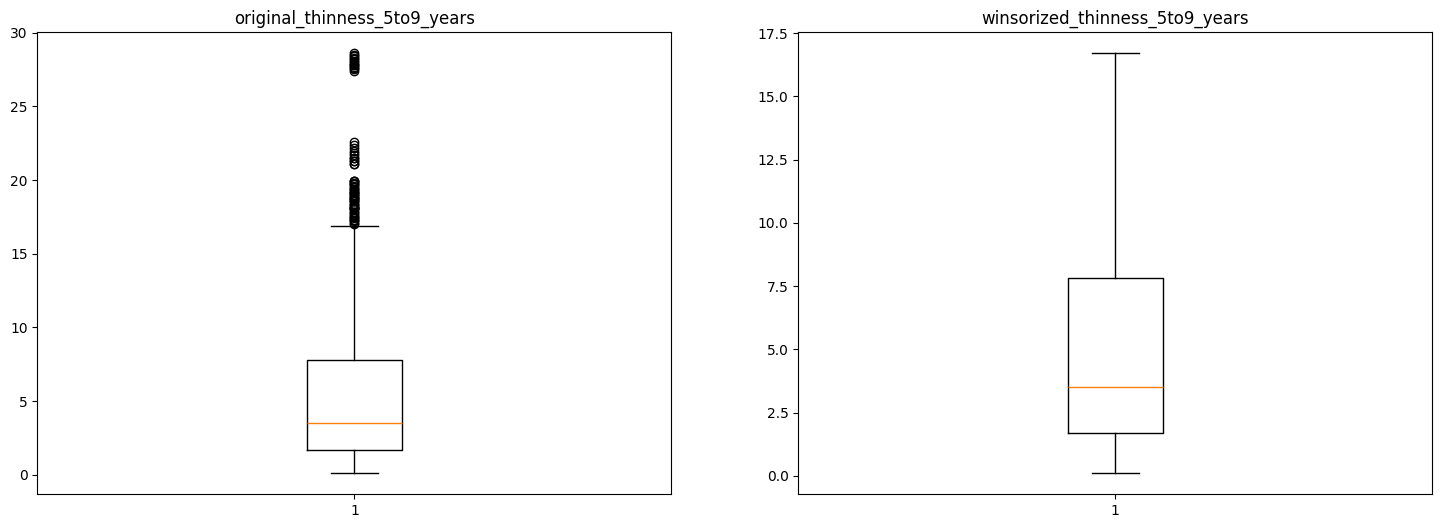

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = le['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(le['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

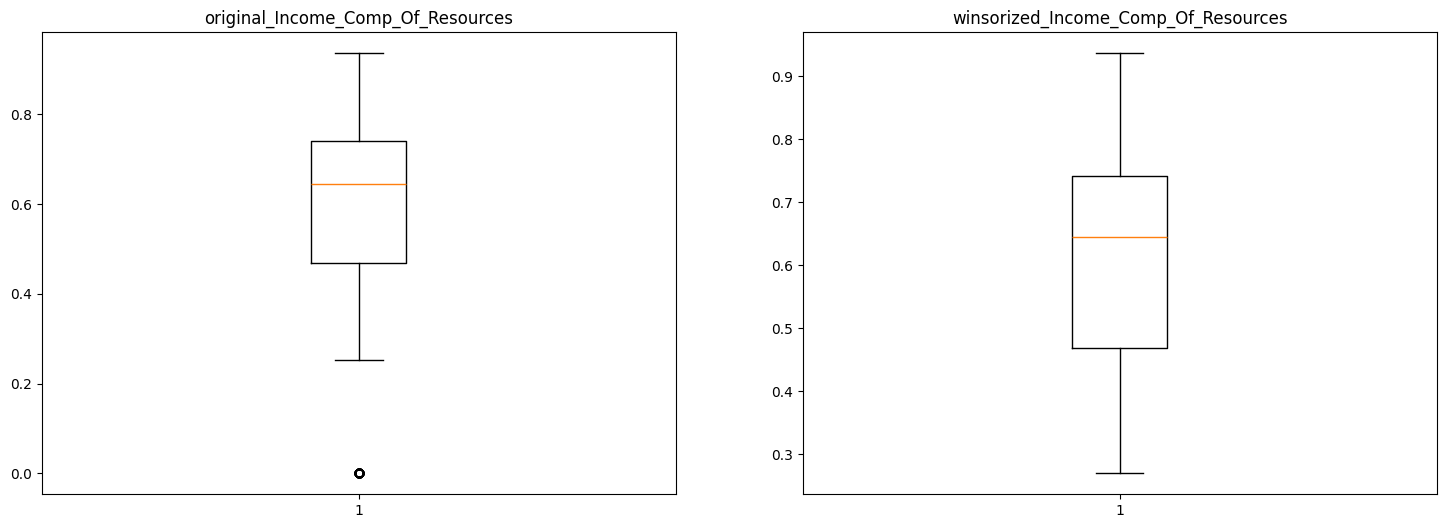

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = le['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(le['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

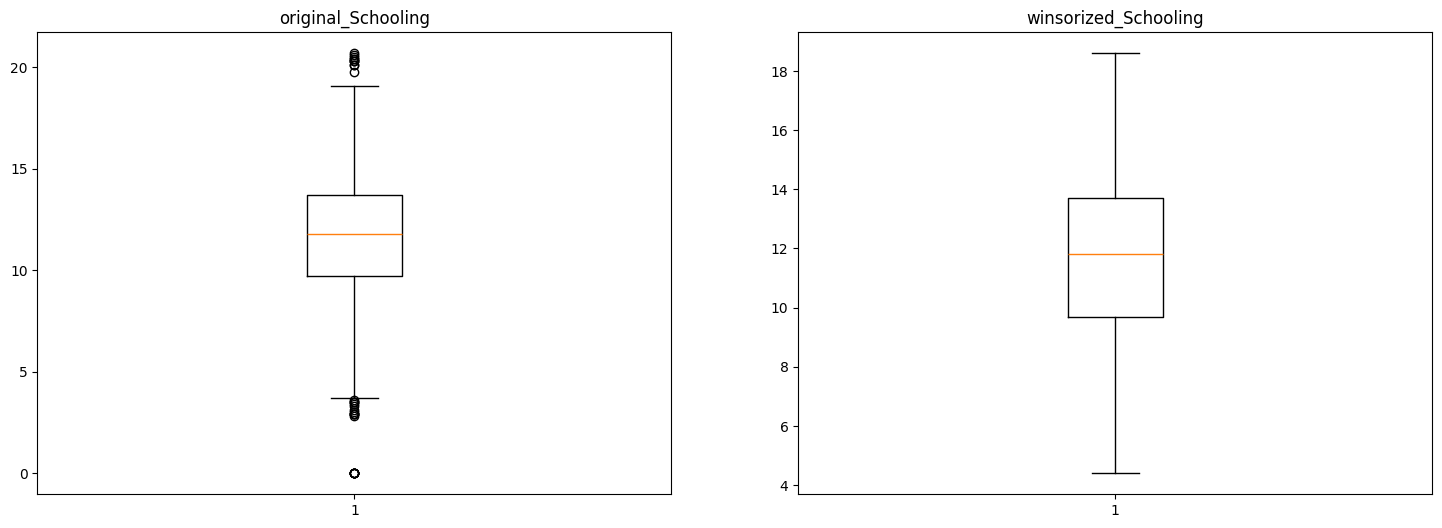

In [33]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = le['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(le['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [34]:
#Смотрим количество выбросных значений после систематизации
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,
            winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,
            winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,
            winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,
            winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 192
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [35]:
#Добавляем систематизированные значения в таблицу
le['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
le['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
le['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
le['winsorized_Alcohol'] = winsorized_Alcohol
le['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
le['winsorized_HepatitisB'] = winsorized_HepatitisB
le['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
le['winsorized_Polio'] = winsorized_Polio
le['winsorized_Tot_Exp'] = winsorized_Tot_Exp
le['winsorized_Diphtheria'] = winsorized_Diphtheria
le['winsorized_HIV'] = winsorized_HIV
le['winsorized_GDP'] = winsorized_GDP
le['winsorized_Population'] = winsorized_Population
le['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
le['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
le['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
le['winsorized_Schooling'] = winsorized_Schooling

In [36]:
le.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,Under_Five_Deaths,Polio,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,...,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1.849000e+03,1849.000000,1849.000000,1849.000000,1849.000000
mean,2006.964846,67.865224,175.843699,37.090860,4.374903,677.262172,73.714440,36.133748,51.554895,80.451595,...,83.002163,5.889162,83.219578,0.885992,2777.352079,4.850890e+06,5.052623,5.121363,0.613165,11.618496
std,4.325545,9.701858,131.349571,138.958391,3.944041,1757.413463,29.006187,19.728856,188.865542,24.008881,...,17.264306,2.282472,17.143096,1.187882,3036.177567,6.278267e+06,4.250330,4.330958,0.175335,3.113564
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,1.400000,0.000000,3.000000,...,45.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.270000,4.400000
25%,2003.000000,61.400000,76.000000,1.000000,0.790000,29.520799,64.000000,18.000000,1.000000,74.000000,...,74.000000,4.360000,75.000000,0.100000,386.328828,1.912660e+05,1.700000,1.700000,0.469000,9.700000
50%,2007.000000,69.700000,154.000000,4.000000,3.640000,103.371069,86.000000,37.800000,4.000000,91.000000,...,91.000000,5.780000,91.000000,0.100000,1326.668820,1.396985e+06,3.500000,3.500000,0.644000,11.800000
75%,2011.000000,74.600000,247.000000,25.000000,7.040000,469.390419,95.000000,54.900000,37.000000,96.000000,...,96.000000,7.390000,96.000000,1.500000,4437.178680,7.815949e+06,7.700000,7.800000,0.741000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,76.700000,2500.000000,99.000000,...,99.000000,11.790000,99.000000,3.200000,8787.613750,1.715336e+07,16.100000,16.700000,0.936000,18.600000


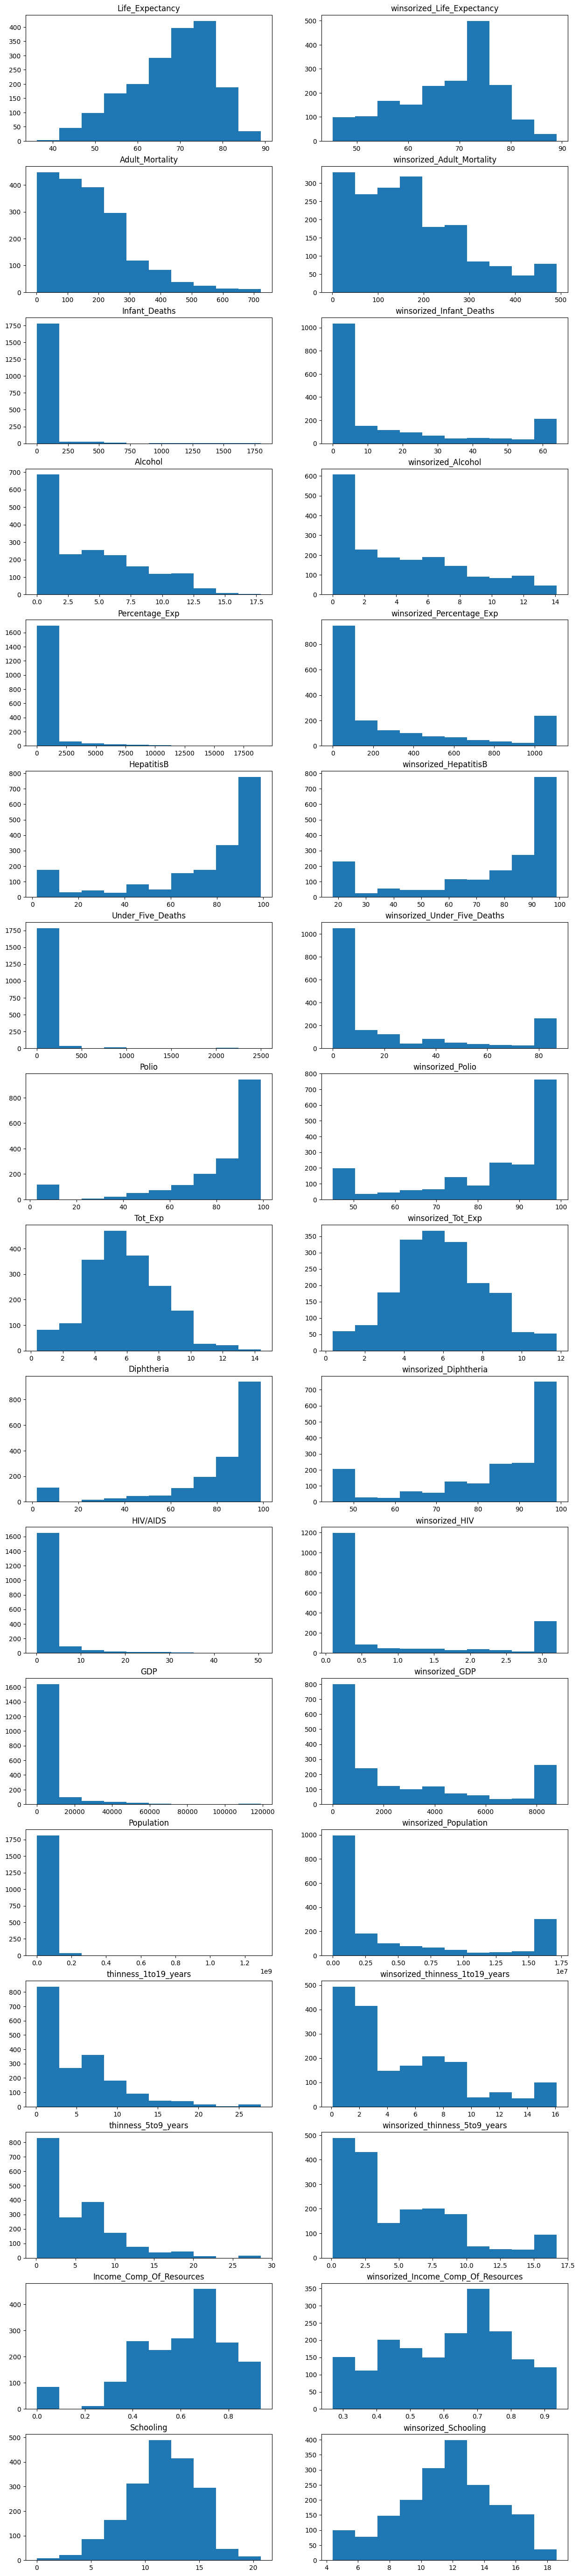

In [37]:
#Смотрим распределение значений для каждого из столбиков
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(le[all_col[i]])
    plt.title(all_col[i])

plt.show()

In [38]:
#Смотрим статистику для интерполированных свойств
#Самая частая страна - Авганистан, всего уникальных стран - 133, в таблице записано 1849 значений
#Авганистан встречается 15 раз.
#Самый популярный статус - развивающаяся страна, это значение встречается 1598 раз из 1849
le.describe(include=['O'])

,Country,Status
count,1849,1849
unique,133,2
top,Afghanistan,Developing
freq,15,1598


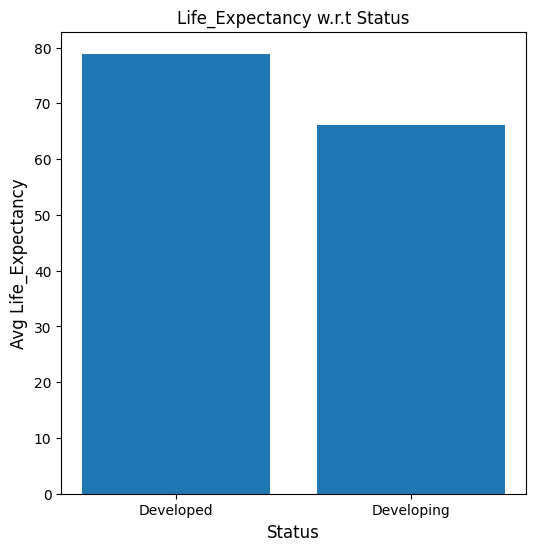

In [39]:
#Сравнение среднего срока жизни в развитых и развивающихся странах
plt.figure(figsize=(6,6))
plt.bar(le.groupby('Status')['Status'].count().index,le.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

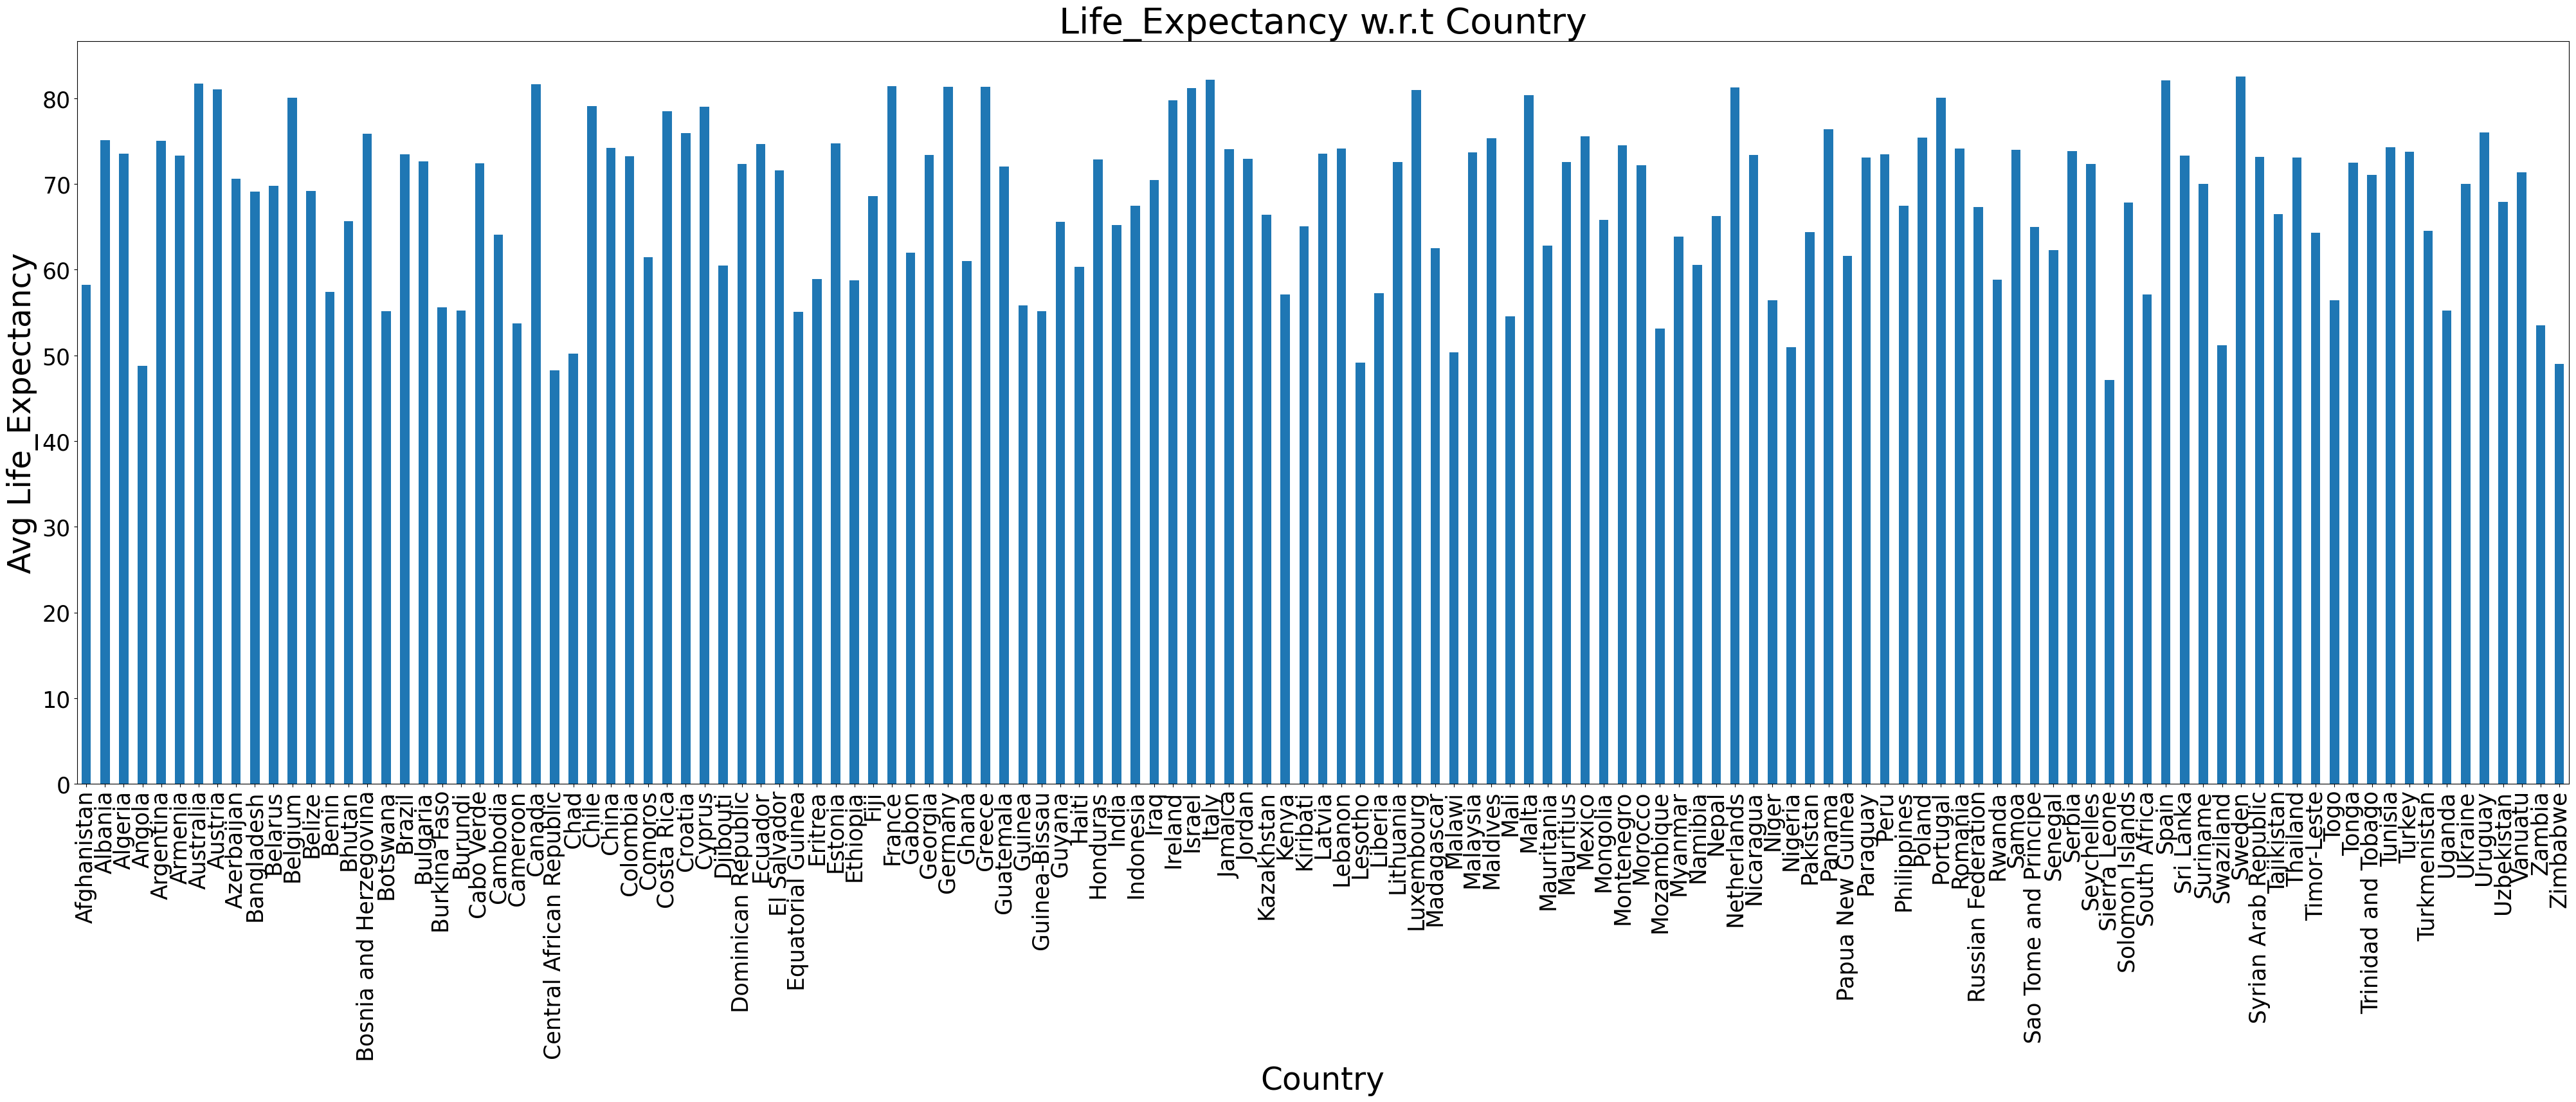

In [40]:
#Средняя прод. жизни для каждой из стран
le_country = le.groupby('Country')['winsorized_Life_Expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

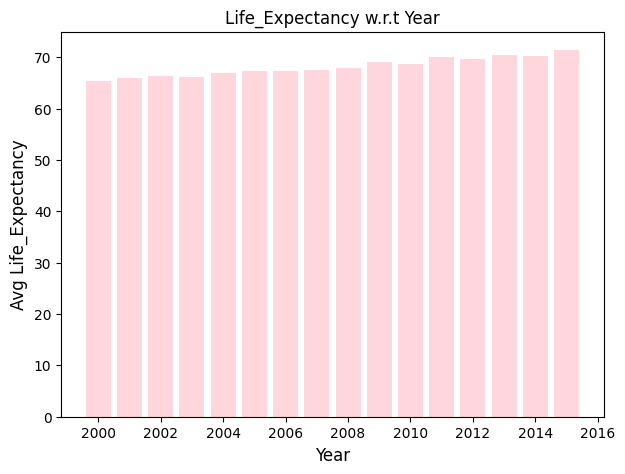

In [41]:
#Средняя продолжительность жизни в зависимости от года
plt.figure(figsize=(7,5))
plt.bar(le.groupby('Year')['Year'].count().index,le.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

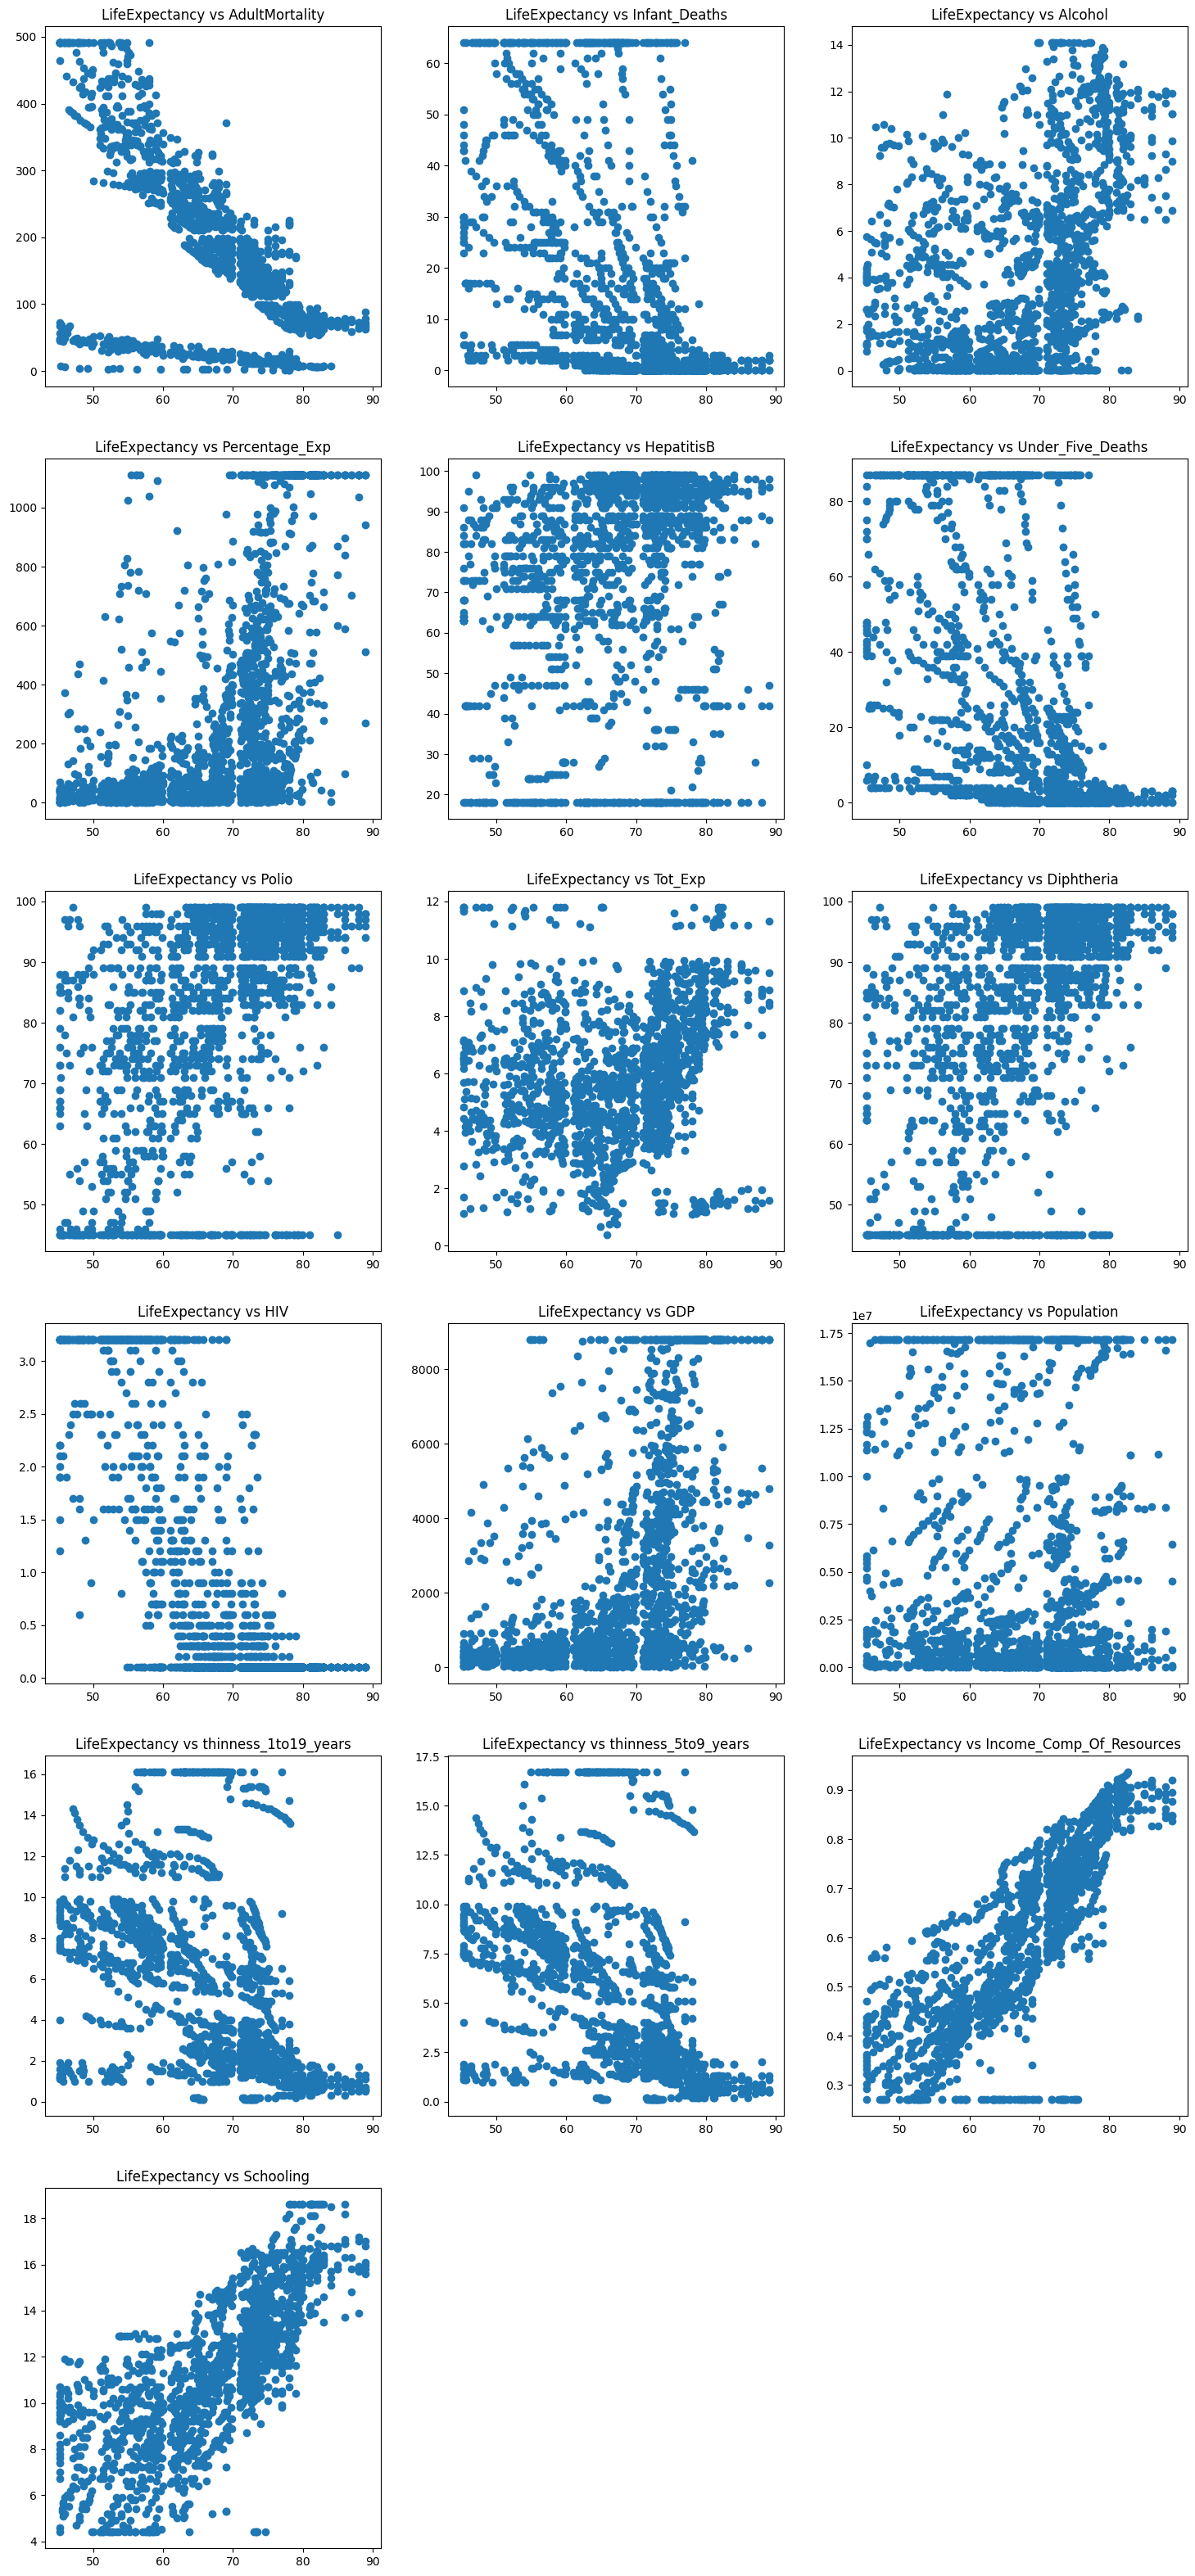

In [42]:
#Точечные графики продолжительности жизни от каждого из свойств
#По оси x - всегда продолжительность жизни
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

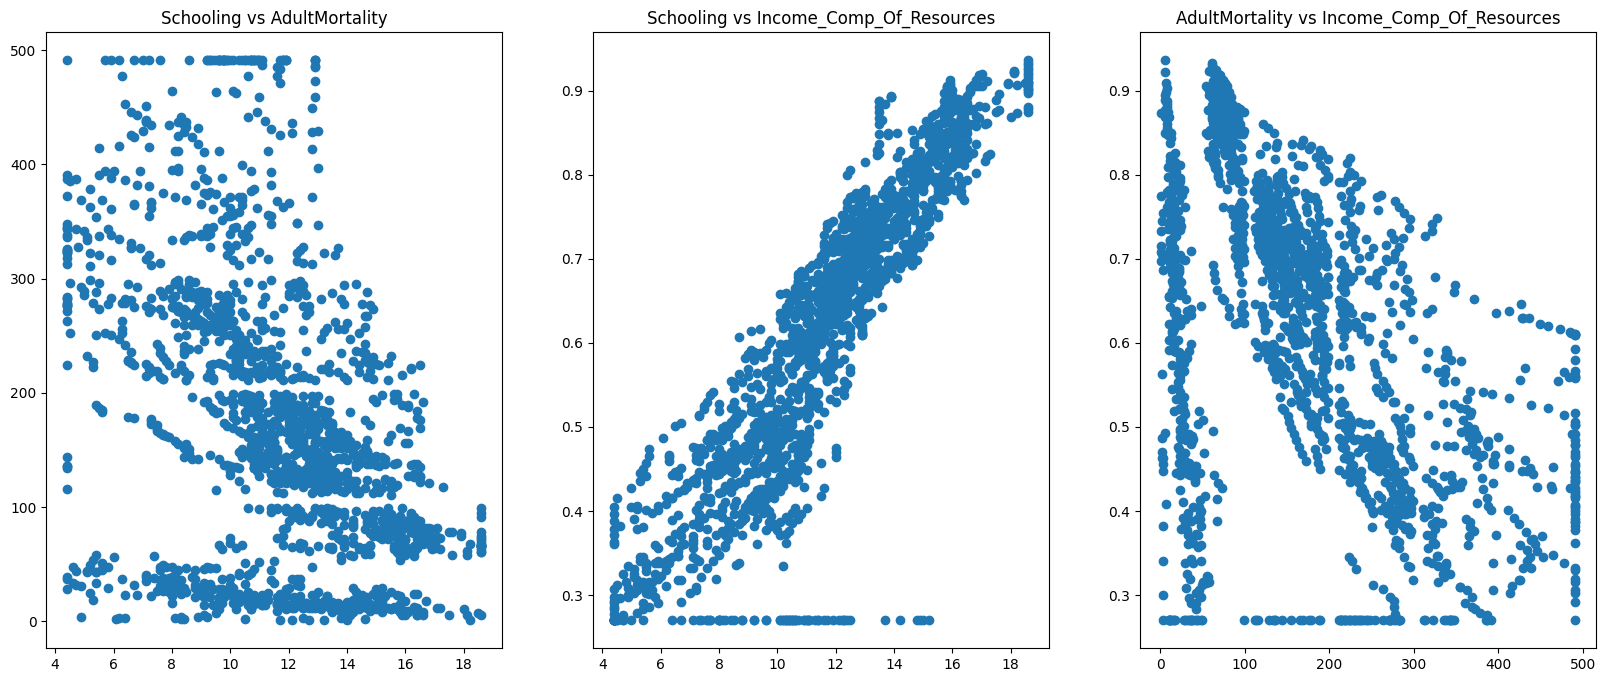

In [43]:
#Было замечено, что продолжительность жизни имеет негативную кореляцию со свойством Взрослая Смертность
#А также позитивную кореляцию со свойством Образование и Конкуренция по доходам
#Было принято решение просмотреть их соотнешение друг с другом.
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(le["winsorized_Adult_Mortality"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

In [44]:
#Заметно, что они как-то взаимосвязаны, проверим с помощью тепловой карты.
le_win = le.iloc[:,21:]
le_win['Country'] = le['Country']
le_win['Year'] = le['Year']
le_win['Status'] = le['Status']
le_win_num = le_win.iloc[:,:-3]
cormat = le_win_num.corr()

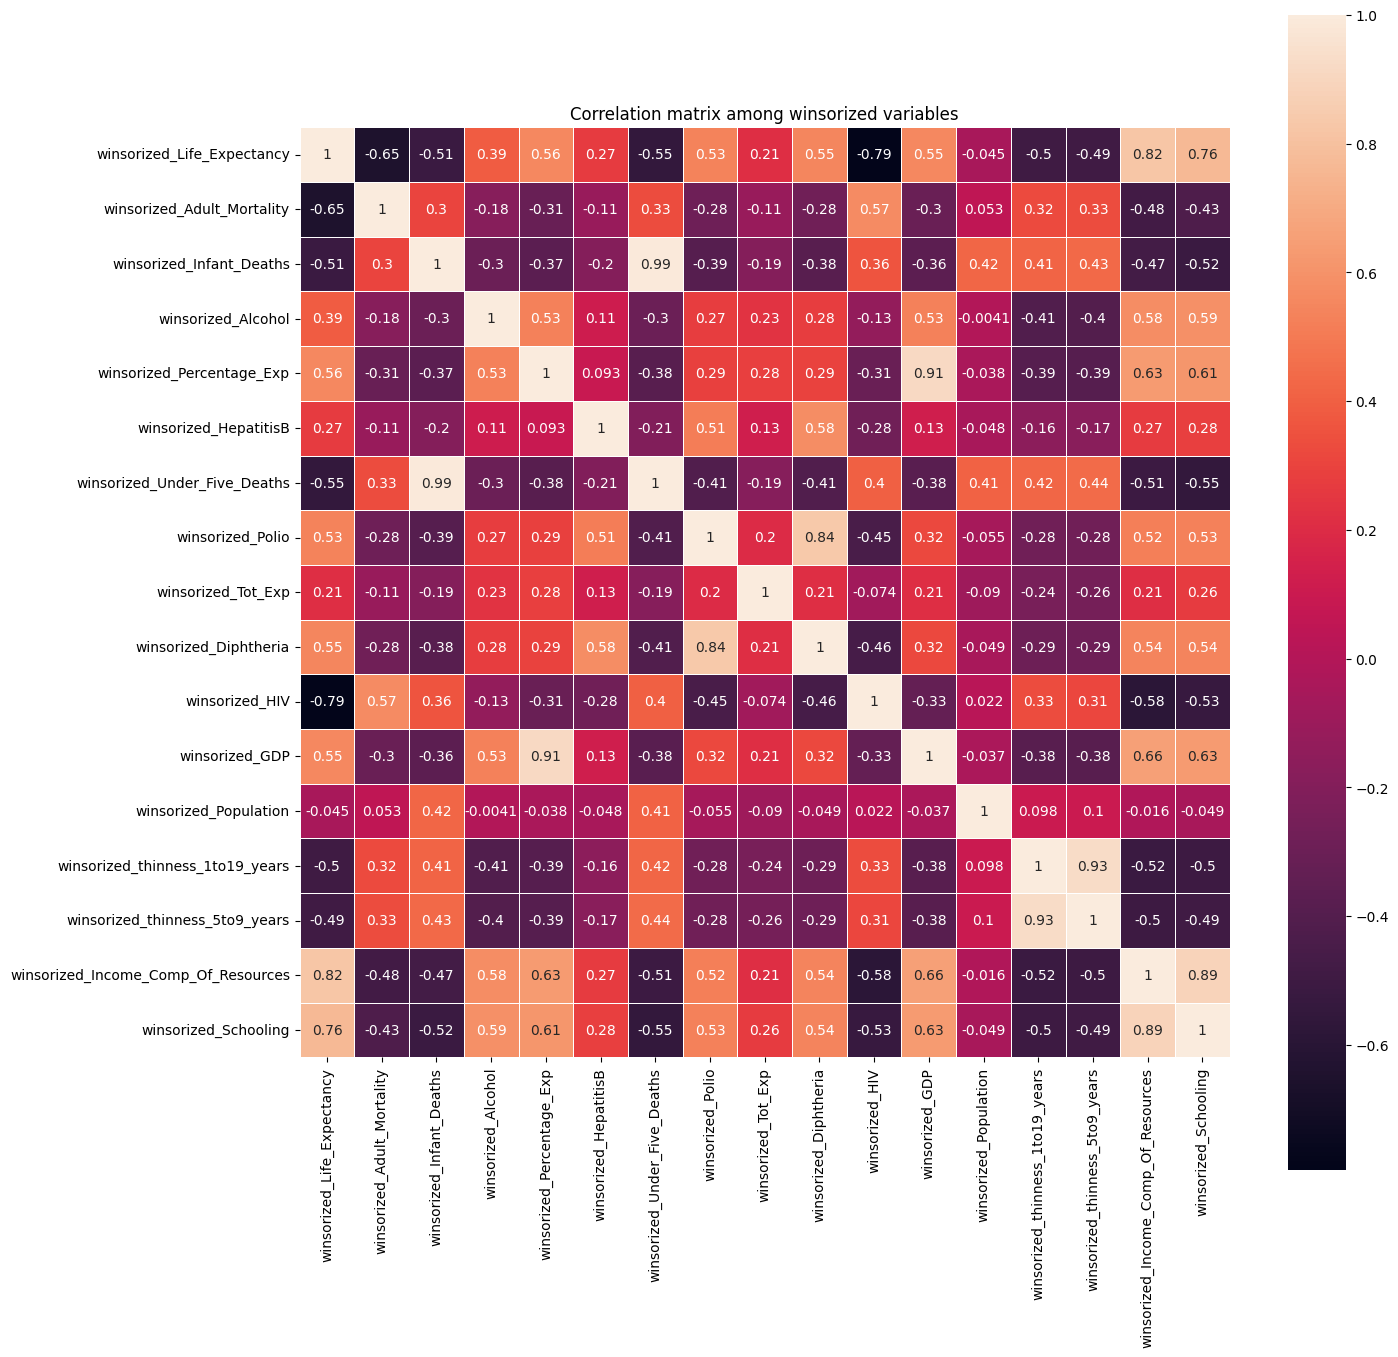

In [45]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

In [ ]:
Из тепловой карты видно, что: 1) Конкуренция по доходам очень сильно кореллируется с Образованием 2) Худощавость в возрасте от 1 до 19 сильно кореллируется с ходобой в возрасте от 5 до 9 3) Полио сильно коррелируется с Дифтерией 4) Процентные расходы сильно кореллируются с ГДП 5) Конкуренция по доходам сильно кореллируется с Ожидаемой прод. жизни 6) Ожидаемая продолжительность жизни и Образование сильно кореллируются. 7) Младенческая смертность сильно кореллируется с смертностью детей до 5 лет. 8) ХИВ негативно коррелируется с Ожидаемой прод. жизни 9) Взрослая смортность негативно кореллируется с Ожидаемой прод. жизни.

In [46]:
#Средняя продолжительность жизни в зависимости от статуса страны
round(le[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.88
Developing,66.13


In [47]:
#Ищем существенные различия между продолжительностью жизни в развитых и развивающихся странах
import scipy.stats as stats
stats.ttest_ind(le.loc[le['Status']=='Developed','Life_Expectancy'],le.loc[le['Status']=='Developing','Life_Expectancy'])

TtestResult(statistic=21.672743843778804, pvalue=5.467828496898697e-93, df=1847.0)

In [ ]:
Так как значение pvalue << 0.05, понимаем, что разница между продолжительностью жизни в странах с разным статусом - существенна. Создадим новую таблицу, куда войдут только свойства, сильно позитивно или негативно кореллирующиеся с Ожидаемой прод. жизни. Однако, нужно исключить свойства, которые кореллируют еще и друг с другом.

In [48]:
feature_df = le[['Status','winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_HIV','winsorized_Adult_Mortality']]

In [49]:
#Переводим все значения в числовые
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.head()

,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,winsorized_HIV,winsorized_Adult_Mortality,Developing
0,65.0,0.479,0.1,263.0,True
1,59.9,0.476,0.1,271.0,True
2,59.9,0.470,0.1,268.0,True
3,59.5,0.463,0.1,272.0,True
4,59.2,0.454,0.1,275.0,True


In [53]:
features = ['winsorized_Adult_Mortality', 'winsorized_Infant_Deaths', 'winsorized_Alcohol',
            'winsorized_Percentage_Exp', 'winsorized_HepatitisB', 'winsorized_Under_Five_Deaths', 'winsorized_Polio',
            'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV', 'winsorized_GDP', 'winsorized_Population',
            'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years', 'winsorized_Income_Comp_Of_Resources',
            'winsorized_Schooling', 'BMI']

X = le[features]
y = le['winsorized_Life_Expectancy']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

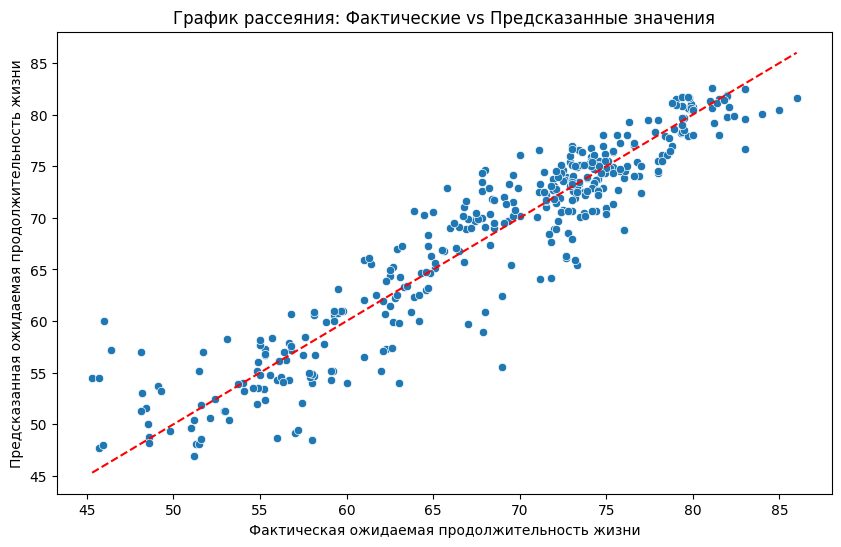

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Фактическая ожидаемая продолжительность жизни')
plt.ylabel('Предсказанная ожидаемая продолжительность жизни')
plt.title('График рассеяния: Фактические vs Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

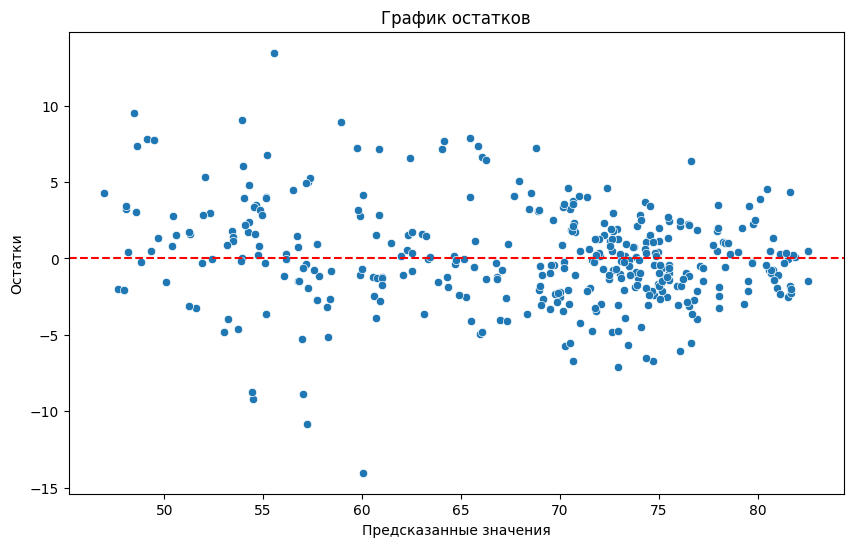

In [56]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

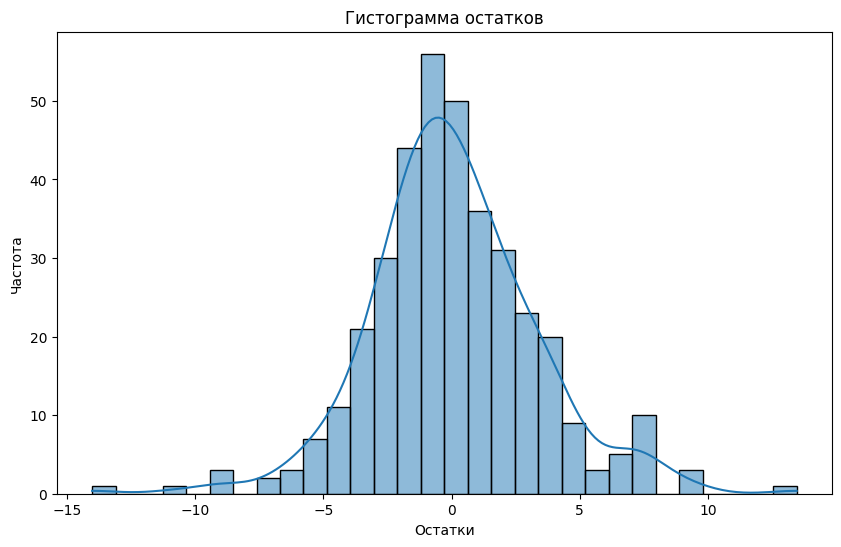

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

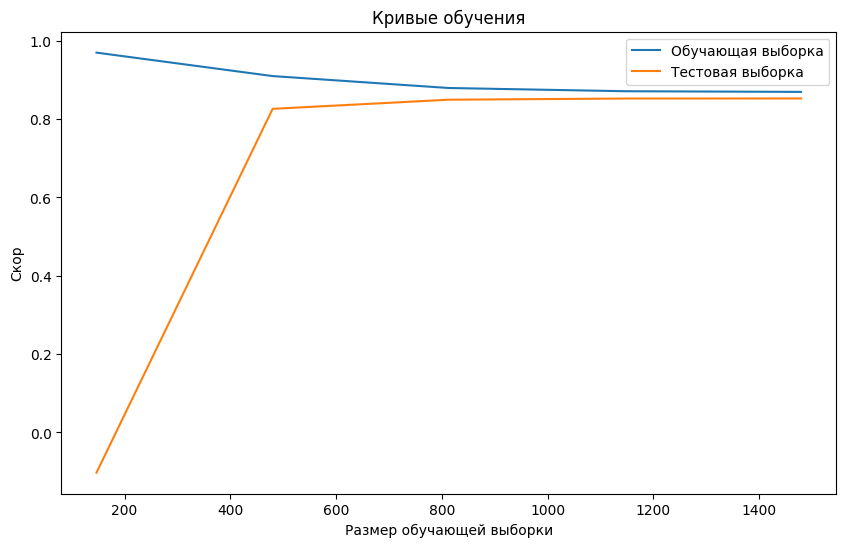

In [58]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Обучающая выборка')
plt.plot(train_sizes, test_scores_mean, label='Тестовая выборка')
plt.title('Кривые обучения')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Скор')
plt.legend()
plt.show()

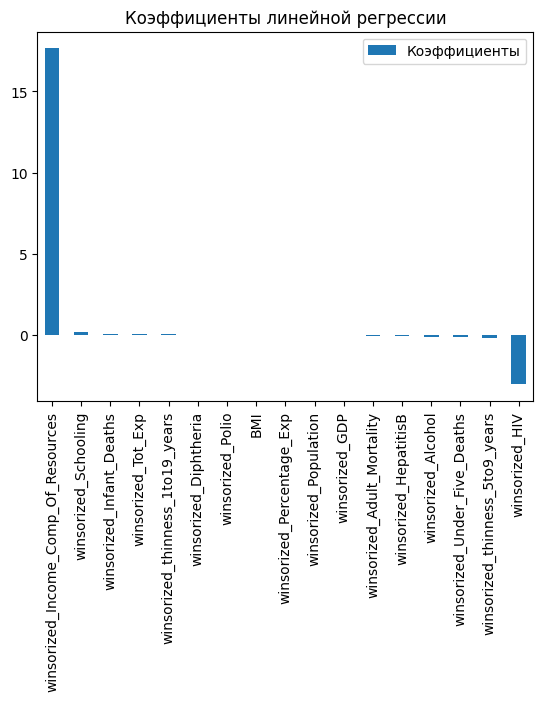

In [59]:
coefficients = pd.DataFrame(model.coef_, features, columns=['Коэффициенты'])
coefficients.sort_values(by='Коэффициенты', ascending=False).plot(kind='bar')
plt.title('Коэффициенты линейной регрессии')
plt.show()